In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("flats.csv")

In [3]:
df.shape

(5589, 3)

In [4]:
df.head()

,header,price,subtitle
0,"3-комнатная квартира, 62.7 м², 2/9 этаж",31000000,"Казыбек би р-н, мкр Юго-Восток, Степной 3 3/8"
1,"2-комнатная квартира, 54 м², 14/16 этаж",18500000,"Казыбек би р-н, мкр Юго-Восток, Республики 18/2"
2,"3-комнатная квартира, 49 м², 5/5 этаж",18500000,"Казыбек би р-н, мкр Юго-Восток, Муканова — Стр..."
3,"2-комнатная квартира, 44 м², 2/9 этаж",18000000,"Казыбек би р-н, мкр Юго-Восток, Мкр муканова 17"
4,"4-комнатная квартира, 80 м², 2/5 этаж",40000000,"Казыбек би р-н, мкр Михайловка , Касыма Аманжо..."


In [5]:
rooms_count = pd.Series(name="rooms_count", dtype=int, data=np.zeros(len(df)))
area = pd.Series(name="area", dtype=float, data=np.zeros(len(df)))
floor = pd.Series(name="floor", dtype=int, data=np.zeros(len(df)))
max_floor = pd.Series(name="max_floors", dtype=int, data=np.zeros(len(df)))

splited_headers = []

In [6]:
def fill_splited_headers():
    for header in df["header"]:
        splited_headers.append(header.split(","))

In [7]:
fill_splited_headers()

In [8]:
def fill_rooms_count():
    for i in range(len(splited_headers)):
        rooms_count.update({i: int(splited_headers[i][0][0])})

In [9]:
def fill_area():
    for i in range(len(splited_headers)):
        num = splited_headers[i][1].replace("м²", "")
        area.update({i : float(num)})

In [10]:
def fill_floors():
    for i in range(len(splited_headers)):
        if(len(splited_headers[i]) == 3):
            cur_floors = splited_headers[i][2].replace(" этаж", "").split("/")
            if len(cur_floors) == 2:
                floor.update({i : int(cur_floors[0])})
                max_floor.update({i: int(cur_floors[1])})
            else:
                floor.update({i : int(cur_floors[0])})

In [11]:
fill_rooms_count()
fill_area()
fill_floors()

In [12]:
import re

In [13]:
district = pd.Series(name="district", dtype=str, data=np.zeros(len(df)))
micro_district = pd.Series(name="micro_district", dtype=str, data=np.zeros(len(df)))
street = pd.Series(name="street", dtype=str, data=np.zeros(len(df)))
splited_subtitles = []

In [14]:
def fill_splited_subtitles():
    for subtitle in df["subtitle"]:
        splited_subtitles.append(subtitle.split(","))

In [15]:
fill_splited_subtitles()

In [16]:
def fill_districts():
    for i in range(len(splited_subtitles)):
        if len(splited_subtitles[i]) > 1:
            district.update({i: splited_subtitles[i][0].lower()})
        else:
            street.update({i : re.sub("\/", "", re.sub("\d", "", splited_subtitles[i][0].lower()))})

In [17]:
def fill_micro_districts():
    for i in range(len(splited_subtitles)):
        if len(splited_subtitles[i]) > 1: 
            micro_district.update({i: splited_subtitles[i][1].lower()})

In [18]:
def fill_streets():
    for i in range(len(splited_subtitles)):
        if len(splited_subtitles[i]) > 2:
            street.update({i: re.sub("\/", "", re.sub("\d", "", splited_subtitles[i][2].lower()))})

In [19]:
fill_districts()
fill_micro_districts()
fill_streets()

In [20]:
result_df = pd.DataFrame()
result_df["rooms_count"] = rooms_count
result_df["area"] = area
result_df["floor"] = floor
result_df["max_floor"] = max_floor
result_df["district"] = district
result_df["micro_district"] = micro_district
result_df["street"] = street

In [21]:
result_df.head()

,rooms_count,area,floor,max_floor,district,micro_district,street
0,3,62.7,2,9,казыбек би р-н,мкр юго-восток,степной
1,2,54.0,14,16,казыбек би р-н,мкр юго-восток,республики
2,3,49.0,5,5,казыбек би р-н,мкр юго-восток,муканова — строителей
3,2,44.0,2,9,казыбек би р-н,мкр юго-восток,мкр муканова
4,4,80.0,2,5,казыбек би р-н,мкр михайловка,касыма аманжолова


In [22]:
def remove_string_from_price():
    for i in range(len(df)):
        df["price"].iloc[i] = re.sub("[^\d]", "", df["price"].iloc[i])

In [23]:
remove_string_from_price()

In [24]:
result_df["price"] = df["price"]
result_df["price"] = result_df["price"].astype("float")

In [25]:
result_df.head()

,rooms_count,area,floor,max_floor,district,micro_district,street,price
0,3,62.7,2,9,казыбек би р-н,мкр юго-восток,степной,31000000.0
1,2,54.0,14,16,казыбек би р-н,мкр юго-восток,республики,18500000.0
2,3,49.0,5,5,казыбек би р-н,мкр юго-восток,муканова — строителей,18500000.0
3,2,44.0,2,9,казыбек би р-н,мкр юго-восток,мкр муканова,18000000.0
4,4,80.0,2,5,казыбек би р-н,мкр михайловка,касыма аманжолова,40000000.0


In [26]:
result_df.shape

(5589, 8)

In [27]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5589 entries, 0 to 5588
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rooms_count     5589 non-null   int32  
 1   area            5589 non-null   float64
 2   floor           5589 non-null   int32  
 3   max_floor       5589 non-null   int32  
 4   district        5589 non-null   object 
 5   micro_district  5589 non-null   object 
 6   street          5589 non-null   object 
 7   price           5589 non-null   float64
dtypes: float64(2), int32(3), object(3)
memory usage: 283.9+ KB


In [28]:
numeric = ["rooms_count", "area", "floor", "max_floor"]
categorical = ["district", "micro_district", "street"]
label = "price"

<AxesSubplot:xlabel='rooms_count', ylabel='count'>

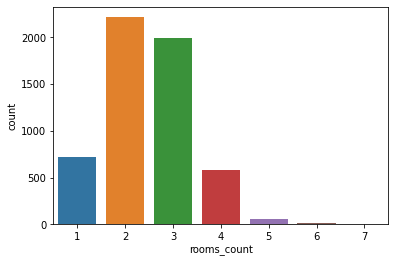

In [29]:
sns.countplot(data=result_df, x="rooms_count")

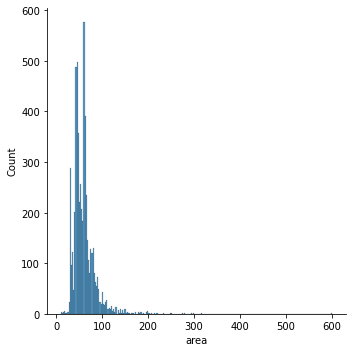

In [30]:
sns.displot(data=result_df, x="area")

<AxesSubplot:xlabel='floor', ylabel='count'>

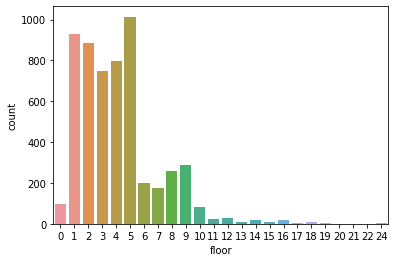

In [31]:
sns.countplot(data=result_df, x="floor")

<AxesSubplot:xlabel='max_floor', ylabel='count'>

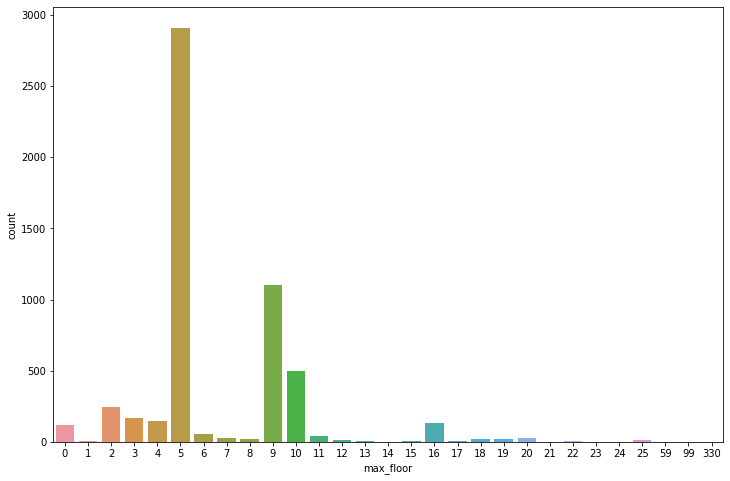

In [32]:
f, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=result_df, x="max_floor")

<AxesSubplot:xlabel='district', ylabel='count'>

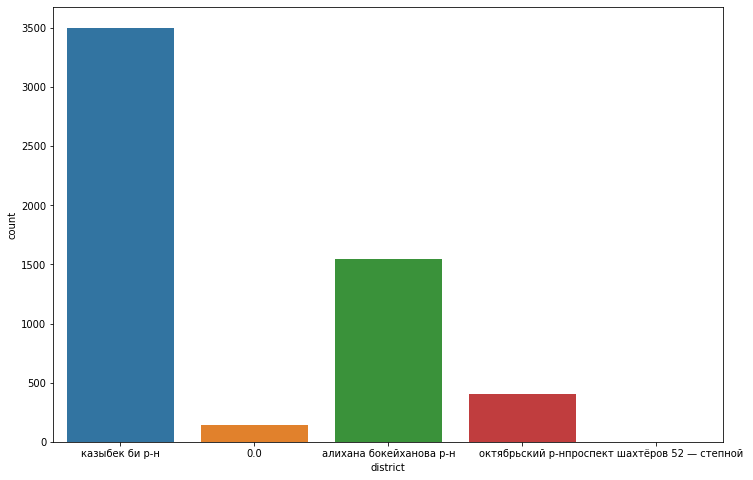

In [33]:
f, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=result_df, x="district")

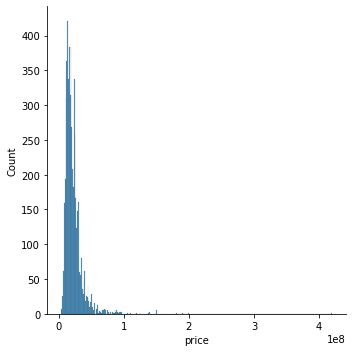

In [34]:
sns.displot(data=result_df, x=label)

In [35]:
result_df["price"] = np.log(result_df["price"])

In [36]:
result_df["area"] = np.log(result_df["area"])

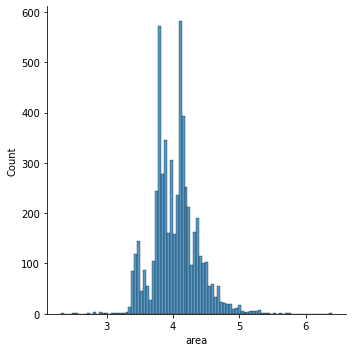

In [37]:
sns.displot(data=result_df, x="area")

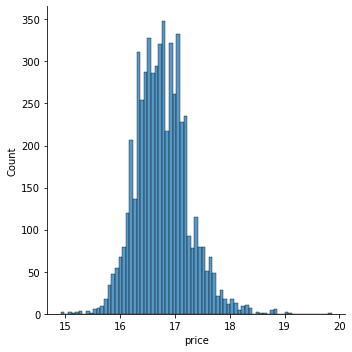

In [38]:
sns.displot(data=result_df, x="price")

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
for col in categorical:
    result_df[col] = LabelEncoder().fit_transform(result_df[col])

In [41]:
result_df.head()

,rooms_count,area,floor,max_floor,district,micro_district,street,price
0,3,4.138361,2,9,2,1003,670,17.249498
1,2,3.988984,14,16,2,1003,645,16.733281
2,3,3.891820,5,5,2,1003,516,16.733281
3,2,3.784190,2,9,2,1003,460,16.705882
4,4,4.382027,2,5,2,829,334,17.504390


<AxesSubplot:>

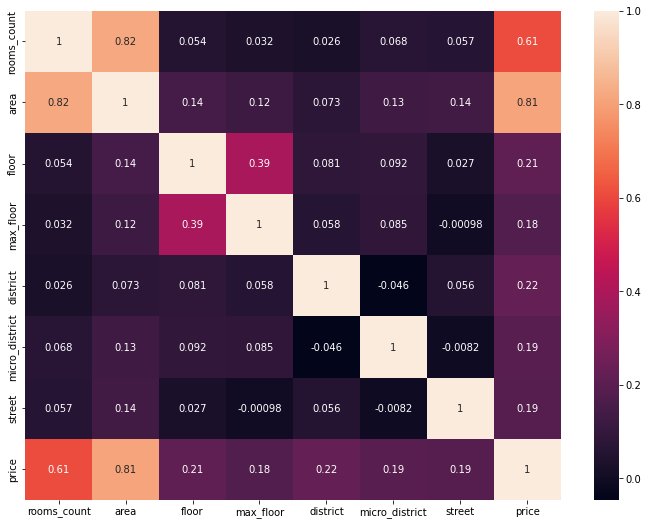

In [42]:
corr = result_df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, annot=True)

In [44]:
result_df = result_df.drop(columns="max_floor")

In [45]:
result_df.head()

,rooms_count,area,floor,district,micro_district,street,price
0,3,4.138361,2,2,1003,670,17.249498
1,2,3.988984,14,2,1003,645,16.733281
2,3,3.891820,5,2,1003,516,16.733281
3,2,3.784190,2,2,1003,460,16.705882
4,4,4.382027,2,2,829,334,17.504390
